In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib widget

# Loss

MIFNO

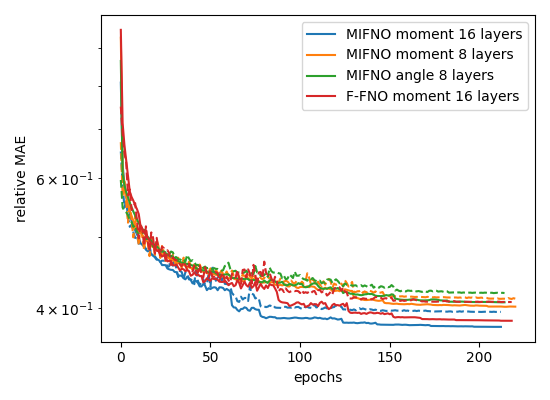

In [2]:
f_moment16 = h5py.File("./logs/loss/loss-MIFNO3D-moment-dv16-16layers-S32-T320-learningrate0p0004-"\
                       "Ntrain27000-batchsize16-normedsource-normedtraces-epoch212on300.h5", "r")
f_moment8 = h5py.File("./logs/loss/loss-MIFNO3D-moment-dv16-8layers-S32-T320-learningrate0p0004-"\
                      "Ntrain27000-batchsize16-normedsource-normedtraces-epoch220on250.h5", "r")
f_angle8 = h5py.File("./logs/loss/loss-MIFNO3D-angle-dv16-8layers-S32-T320-learningrate0p0004-"\
                     "Ntrain27000-batchsize16-normedsource-normedtraces-epoch214on250.h5", "r")
f_FFNOmoment16 = h5py.File("./logs/loss/loss-FFNO3D-moment-dv16-16layers-S32-T320-learningrate0p0004-"\
                           "Ntrain27000-batchsize16-normedsource-normedtraces-epoch218on250.h5", "r")

fig, ax = plt.subplots(figsize=(5.5,4))
l = ax.semilogy(f_moment16['epochs'][:], f_moment16['train_loss_relative'][:], label='MIFNO moment 16 layers')
ax.semilogy(f_moment16['epochs'][:], f_moment16['val_loss_relative'][:], '--', color=l[0].get_color())

l = ax.semilogy(f_moment8['epochs'][:], f_moment8['train_loss_relative'][:], label='MIFNO moment 8 layers')
ax.semilogy(f_moment8['epochs'][:], f_moment8['val_loss_relative'][:], '--', color=l[0].get_color())

l = ax.semilogy(f_angle8['epochs'][:], f_angle8['train_loss_relative'][:], label='MIFNO angle 8 layers')
ax.semilogy(f_angle8['epochs'][:], f_angle8['val_loss_relative'][:], '--', color=l[0].get_color())

l = ax.semilogy(f_FFNOmoment16['epochs'][:], f_FFNOmoment16['train_loss_relative'][:], label='F-FNO moment 16 layers')
ax.semilogy(f_FFNOmoment16['epochs'][:], f_FFNOmoment16['val_loss_relative'][:], '--', color=l[0].get_color())

ax.set_xlabel('epochs')
ax.set_ylabel('relative MAE')
#ax.set_ylim([0.35, 0.85])
ax.legend(loc='upper right')
fig.tight_layout()
plt.show()

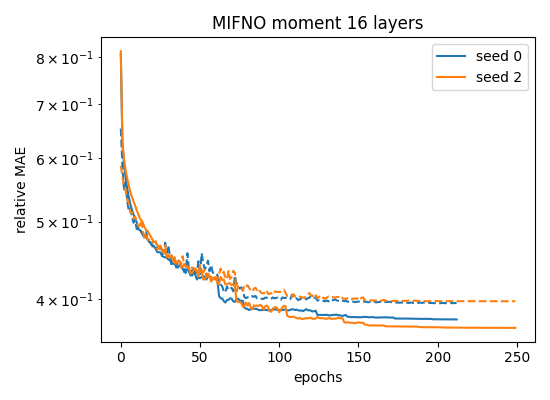

In [3]:
f_moment16 = h5py.File("./logs/loss/loss-MIFNO3D-moment-dv16-16layers-S32-T320-learningrate0p0004-"\
                       "Ntrain27000-batchsize16-normedsource-normedtraces-epoch212on300.h5", "r")
# f_moment16_seed1 = h5py.File("./logs/loss/loss-MIFNO3D-moment-dv16-16layers-S32-T320-learningrate0p0004-"\
#                        "Ntrain27000-batchsize16-normedsource-normedtraces-seed1-epochs250.h5", "r")
f_moment16_seed2 = h5py.File("./logs/loss/loss-MIFNO3D-moment-dv16-16layers-S32-T320-learningrate0p0004-"\
                       "Ntrain27000-batchsize16-normedsource-normedtraces-seed2-epochs250.h5", "r")

fig, ax = plt.subplots(figsize=(5.5,4))
l = ax.semilogy(f_moment16['epochs'][:], f_moment16['train_loss_relative'][:], label='seed 0')
ax.semilogy(f_moment16['epochs'][:], f_moment16['val_loss_relative'][:], '--', color=l[0].get_color())

# l = ax.semilogy(f_moment16_seed1['epochs'][:], f_moment16_seed1['train_loss_relative'][:], label='seed 1')
# ax.semilogy(f_moment16_seed1['epochs'][:], f_moment16_seed1['val_loss_relative'][:], '--', color=l[0].get_color())

l = ax.semilogy(f_moment16_seed2['epochs'][:], f_moment16_seed2['train_loss_relative'][:], label='seed 2')
ax.semilogy(f_moment16_seed2['epochs'][:], f_moment16_seed2['val_loss_relative'][:], '--', color=l[0].get_color())

ax.set_xlabel('epochs')
ax.set_ylabel('relative MAE')
#ax.set_ylim([0.35, 0.85])
ax.set_title('MIFNO moment 16 layers')
ax.legend(loc='upper right')
fig.tight_layout()
plt.show()

# Geologies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from palettable.cartocolors.diverging import Fall_6

def plot3Dcube(mat, Xvec, Yvec, Zvec, mask=None, cmap=Fall_6.mpl_colormap,
               title='', figsize=(4.5,4), aspect = None,
               vmin=1000, vmax=4500,
               xlabel='x (km)', ylabel='y (km)', zlabel='z (km)', vlabel='$V_S$ (m/s)',
               grid=True, colorbar=True, name_save='', dpi=100, label_fontsize=11,
              xticks=None, yticks=None, zticks=None):
    ''' 
    mat : (Nx, Ny, Nz) 3D array of scalars indexed by x, y, z 
    Xvec : (Nx,) coordinates of the x axis
    Yvec : (Ny,) coordinates of the y axis
    Zvec : (Nz,) coordinates of the z axis
    mask : (Nx, Ny, Nz) 3D array containing ones for pixel to draw and 0 for pixels to hide
    '''

    if Xvec[1]<=Xvec[0]:
        raise Exception('Xvec must be in ascending order')
    if Yvec[1]<=Yvec[0]:
        raise Exception('Yvec must be in ascending order')
    if Zvec[1]<=Zvec[0]:
        raise Exception('Zvec must be in ascending order')

    if Xvec.shape[0]!=mat.shape[0]:
        raise Exception(f'The shape of Xvec ({Xvec.shape}) does not match the first axis of mat ({mat.shape[0]})')
    if Yvec.shape[0]!=mat.shape[1]:
        raise Exception(f'The shape of Yvec ({Yvec.shape}) does not match the second axis of mat ({mat.shape[1]})')
    if Zvec.shape[0]!=mat.shape[2]:
        raise Exception(f'The shape of Zvec ({Zvec.shape}) does not match the third axis of mat ({mat.shape[2]})')

    # we extend each coordinates by one step to include the boundaries of each axis
    Xvec2 = np.concatenate([Xvec, [Xvec[-1]+Xvec[1]-Xvec[0]]])
    Yvec2 = np.concatenate([Yvec, [Yvec[-1]+Yvec[1]-Yvec[0]]])
    Zvec2 = np.concatenate([Zvec, [Zvec[-1]+Zvec[1]-Zvec[0]]])
    Xmat, Ymat, Zmat = np.meshgrid(Xvec2, Yvec2, Zvec2, indexing='ij')

    # create the color array from normalized data
    if vmin is None:
        vmin = mat.min()
    if vmax is None:
        vmax = mat.max()

    cmap = cm.get_cmap(cmap, 256)
    cmap_array = cmap((mat-vmin)/(vmax-vmin)) # R G B alpha
    colors = np.zeros(mat.shape + (4,))
    colors[..., 0] = cmap_array[:,:,:,0]
    colors[..., 1] = cmap_array[:,:,:,1]
    colors[..., 2] = cmap_array[:,:,:,2]
    colors[..., 3] = 1

    # mask to show only some selected cells
    if mask is None:
        filled = np.ones_like(mat)
    else:
        assert mask.shape == mat.shape
        filled = mask

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect(aspect=aspect)
    fig.subplots_adjust(left=0.1, right=0.94, bottom=0.06, top=0.9)
    # move the zaxis to the left
    tmp_planes = ax.zaxis._PLANES
    ax.zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                        tmp_planes[0], tmp_planes[1],
                        tmp_planes[4], tmp_planes[5])
    ax.zaxis.set_rotate_label(False)
    ax.set_xlim([Xvec2[0],Xvec2[-1]])
    ax.set_ylim([Yvec2[0],Yvec2[-1]])
    ax.set_zlim([Zvec2[0],Zvec2[-1]])
    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabel, fontsize=label_fontsize)
    ax.set_zlabel(zlabel, fontsize=label_fontsize, rotation=90)
    
    if xticks is not None:
        ax.set_xticks(xticks)
    if yticks is not None:
        ax.set_yticks(yticks)
    if zticks is not None:
        ax.set_zticks(zticks)
    ax.tick_params(axis='both', labelsize=label_fontsize)

    ax.voxels(Xmat, Ymat, Zmat,
              filled,
              facecolors=colors,
              edgecolors = colors,
              linewidth=0.5)  
    
    ax.scatter(4.4, 4.5, -8, marker='*', color='k', s=200)
    
    m = cm.ScalarMappable(cmap=cmap, 
                          norm=Normalize(vmin=vmin, vmax=vmax)
                         )
    m.set_array([])
    if title!='':
        ax.set_title(title, y=0.96)
    
    if colorbar:
        clb = plt.colorbar(m, shrink=0.7, pad=0.05)
        clb.ax.tick_params(labelsize=label_fontsize)
        clb.set_label(label=vlabel, size=label_fontsize)
    
    if grid==False:
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        plt.axis('off')
    
    ax.view_init(elev=15, azim=310, roll=0)
    
    if name_save != '':
        plt.savefig(name_save, transparent=True)
        plt.close()
    else:
        plt.show()

In [2]:
f32 = h5py.File('./data/formatted/HEMEWS3D_S32_Z32_T320_fmax5_rot0_train/sample0.h5', 'r')
f64 = h5py.File('./data/formatted/HEMEWS3D_S64_Z64_T320_fmax5_rot0_train/sample0.h5', 'r')

/tmp/ipykernel_9580/3117035127.py:103: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  clb = plt.colorbar(m, shrink=0.7, pad=0.05)


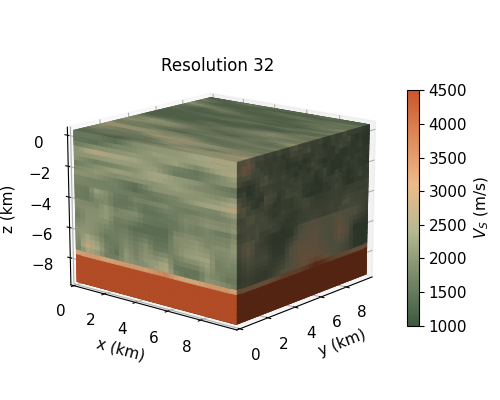

In [5]:
plot3Dcube(f32['a'][:],
           Xvec = np.linspace(0, 9.6, 32), Yvec = np.linspace(0, 9.6, 32), 
           Zvec = np.linspace(-9.6, 0, 32), cmap=Fall_6.mpl_colormap, vmin=1000, vmax = 4500,
           figsize=(5,4), dpi=100,
           xlabel='x (km)', ylabel='y (km)', zlabel='z (km)', vlabel='$V_S$ (m/s)',
           title=f'Resolution 32'
          )

/tmp/ipykernel_9580/3117035127.py:103: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  clb = plt.colorbar(m, shrink=0.7, pad=0.05)


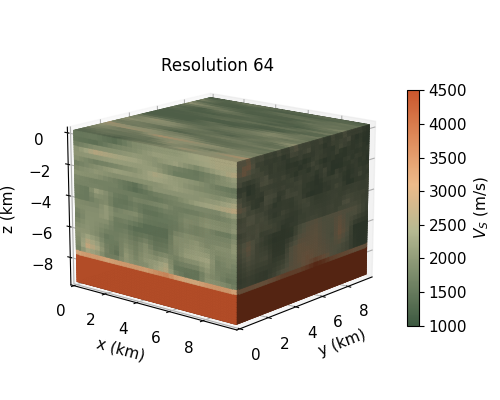

In [6]:
plot3Dcube(f64['a'][:],
           Xvec = np.linspace(0, 9.6, 64), Yvec = np.linspace(0, 9.6, 64), 
           Zvec = np.linspace(-9.6, 0, 64), cmap=Fall_6.mpl_colormap, vmin=1000, vmax = 4500,
           figsize=(5,4), dpi=100,
           xlabel='x (km)', ylabel='y (km)', zlabel='z (km)', vlabel='$V_S$ (m/s)',
           title=f'Resolution 64'
          )

# Velocity fields

Plot wavefields at a given time instant.

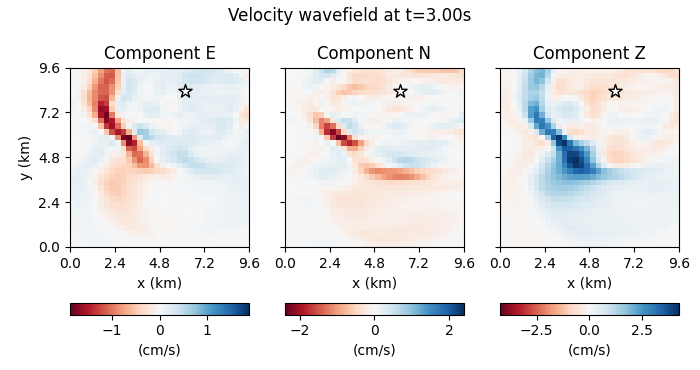

In [29]:
dt = 0.02
t = 3
it = int(t/dt)

fig, axs = plt.subplots(1, 3, figsize=(7,3.7), sharex=True, sharey=True)
fig.subplots_adjust(left=0.1, bottom=0.2, right=0.97, top=0.95)
ticks = np.linspace(0, 9.6, 5)
for ax, c in zip(axs.flatten(), ['E', 'N', 'Z']):
    m = 100*np.max(np.abs(f32[f'u{c}'][:, :, it]))
    im = ax.imshow(100*f32[f'u{c}'][:, :, it], origin='lower', vmin=-m, vmax=m, cmap='RdBu', extent=(0,9.6,0,9.6))
    ax.scatter(1e-3*f32['s'][0], 1e-3*f32['s'][1], marker='*', color='white', edgecolor='k', s=100)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_title(f"Component {c}")
    ax.set_xlabel('x (km)')
    cax = plt.axes([ax.get_position().xmin, 0.15, ax.get_position().xmax-ax.get_position().xmin, 0.03])
    fig.colorbar(im, cax=cax, orientation='horizontal', label='(cm/s)')
axs[0].set_ylabel('y (km)')
fig.suptitle(f"Velocity wavefield at t={t:.2f}s")
plt.show()

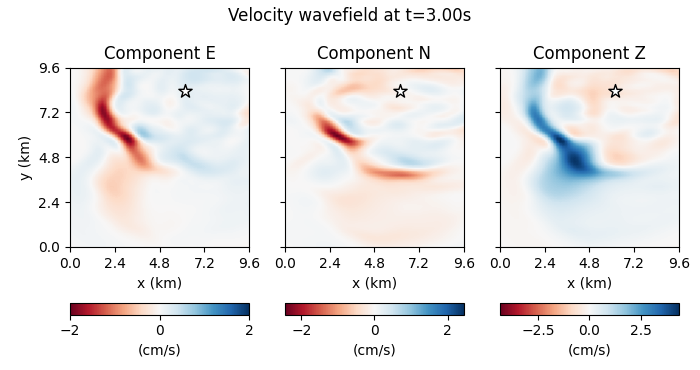

In [30]:
dt = 0.02
t = 3
it = int(t/dt)

fig, axs = plt.subplots(1, 3, figsize=(7,3.7), sharex=True, sharey=True)
fig.subplots_adjust(left=0.1, bottom=0.2, right=0.97, top=0.95)
ticks = np.linspace(0, 9.6, 5)
for ax, c in zip(axs.flatten(), ['E', 'N', 'Z']):
    m = 100*np.max(np.abs(f64[f'u{c}'][:, :, it]))
    im = ax.imshow(100*f64[f'u{c}'][:, :, it], origin='lower', vmin=-m, vmax=m, cmap='RdBu', extent=(0,9.6,0,9.6))
    ax.scatter(1e-3*f64['s'][0], 1e-3*f64['s'][1], marker='*', color='white', edgecolor='k', s=100)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_title(f"Component {c}")
    ax.set_xlabel('x (km)')
    cax = plt.axes([ax.get_position().xmin, 0.15, ax.get_position().xmax-ax.get_position().xmin, 0.03])
    fig.colorbar(im, cax=cax, orientation='horizontal', label='(cm/s)')
axs[0].set_ylabel('y (km)')
fig.suptitle(f"Velocity wavefield at t={t:.2f}s")
plt.show()